In [1]:
##Folder to print results
folder="Results/nantes"

##Station
file="TX_STAID000737.txt"

##AR model
p=2
method_="monthlyLL"                 # "mean", "median", "concat", "sumLL", "monthlyLL"
periodicity_model="trigo"           # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period=0                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype="LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam=nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model="trigo"         # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period=0                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype="LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam=nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n=2000

2000

In [7]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd(@__DIR__)

In [3]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => "TX_STAID000737.txt"
  "p"                   => 2
  "method_"             => "monthlyLL"
  "periodicity_model"   => "trigo"
  "degree_period"       => 0
  "Trendtype"           => "LOESS"
  "trendparam"          => nothing
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 0
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => nothing
  "n"                   => 2000

In [4]:
series=extract_series(file,plot=false)
series=truncate_MV(series)

Caracteristics_Series = init_CaracteristicsSeries(series)

CaracteristicsSeries([5.60864197530864, 6.085185185185186, 5.533333333333334, 5.366666666666667, 5.71604938271605, 5.772839506172841, 5.401234567901234, 5.356790123456789, 5.698765432098765, 5.741975308641977  …  6.827160493827159, 6.672839506172841, 6.477777777777777, 6.506172839506172, 6.359259259259259, 5.904938271604938, 5.898765432098766, 5.862962962962961, 5.881481481481481, 5.590123456790123], [14.3, 13.9, 13.1, 13.4, 13.4, 14.7, 13.5, 13.4, 14.5, 13.2  …  14.1, 14.2, 13.2, 14.4, 13.8, 13.1, 14.2, 14.2, 16.0, 16.1], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       5.72561      4.27158         15.2
   2 │     2       6.92369      4.30074         19.0
   3 │     3      10.4113       4.13513         24.8
   4 │     4      13.9756       4.33257         27.9
   5 │     5      17.7996       4.37329         31.7
   6 │     6      20.7504    

In [5]:
Model = fit_AR(series[:, 2], series.DATE,
    p=p,
    method_=method_,
    periodicity_model=periodicity_model,
    degree_period=degree_period,
    Trendtype=Trendtype,
    trendparam=trendparam,
    σ_periodicity_model=σ_periodicity_model,
    σ_degree_period=σ_degree_period,
    σ_Trendtype=σ_Trendtype,
    σ_trendparam=σ_trendparam)

sample_ = rand(Model, n, series.DATE,return_res=true)


([[10.0, 8.6, 5.584152411076162, 4.841664159841849, 2.8653697550497212, 2.016252564699686, -1.5183956122933955, 1.469077749113361, 7.314487862193844, 10.32129479016561  …  11.066539438414914, 8.507808786124695, 4.99545678397752, 5.75394969506643, 7.216999665469206, 8.311871545781106, 6.5474823211323185, 7.820180133250258, 11.038625735532248, 12.298204407464084], [10.0, 8.6, 5.688230636462403, 7.911468623264626, 4.623690705103068, 0.35113514970072135, 3.30620570691149, 7.882610132791541, 3.1533739532946576, 1.2027042672392456  …  8.611040890645787, 13.155735201591156, 12.562167287951137, 14.870118599115472, 12.028321581909985, 9.748736569348925, 14.58534794560681, 11.732289499225555, 12.766149879360164, 15.076838598112564], [10.0, 8.6, 5.364966878181065, 1.3809781166661992, 4.956230876894733, 2.8725457271027692, 9.625628652465004, 11.24020328792084, 6.973495870149465, 6.110183877113725  …  7.409619779065643, 6.890483281950226, 6.051302298734273, 7.169353614863677, 10.478341362664533, 9.

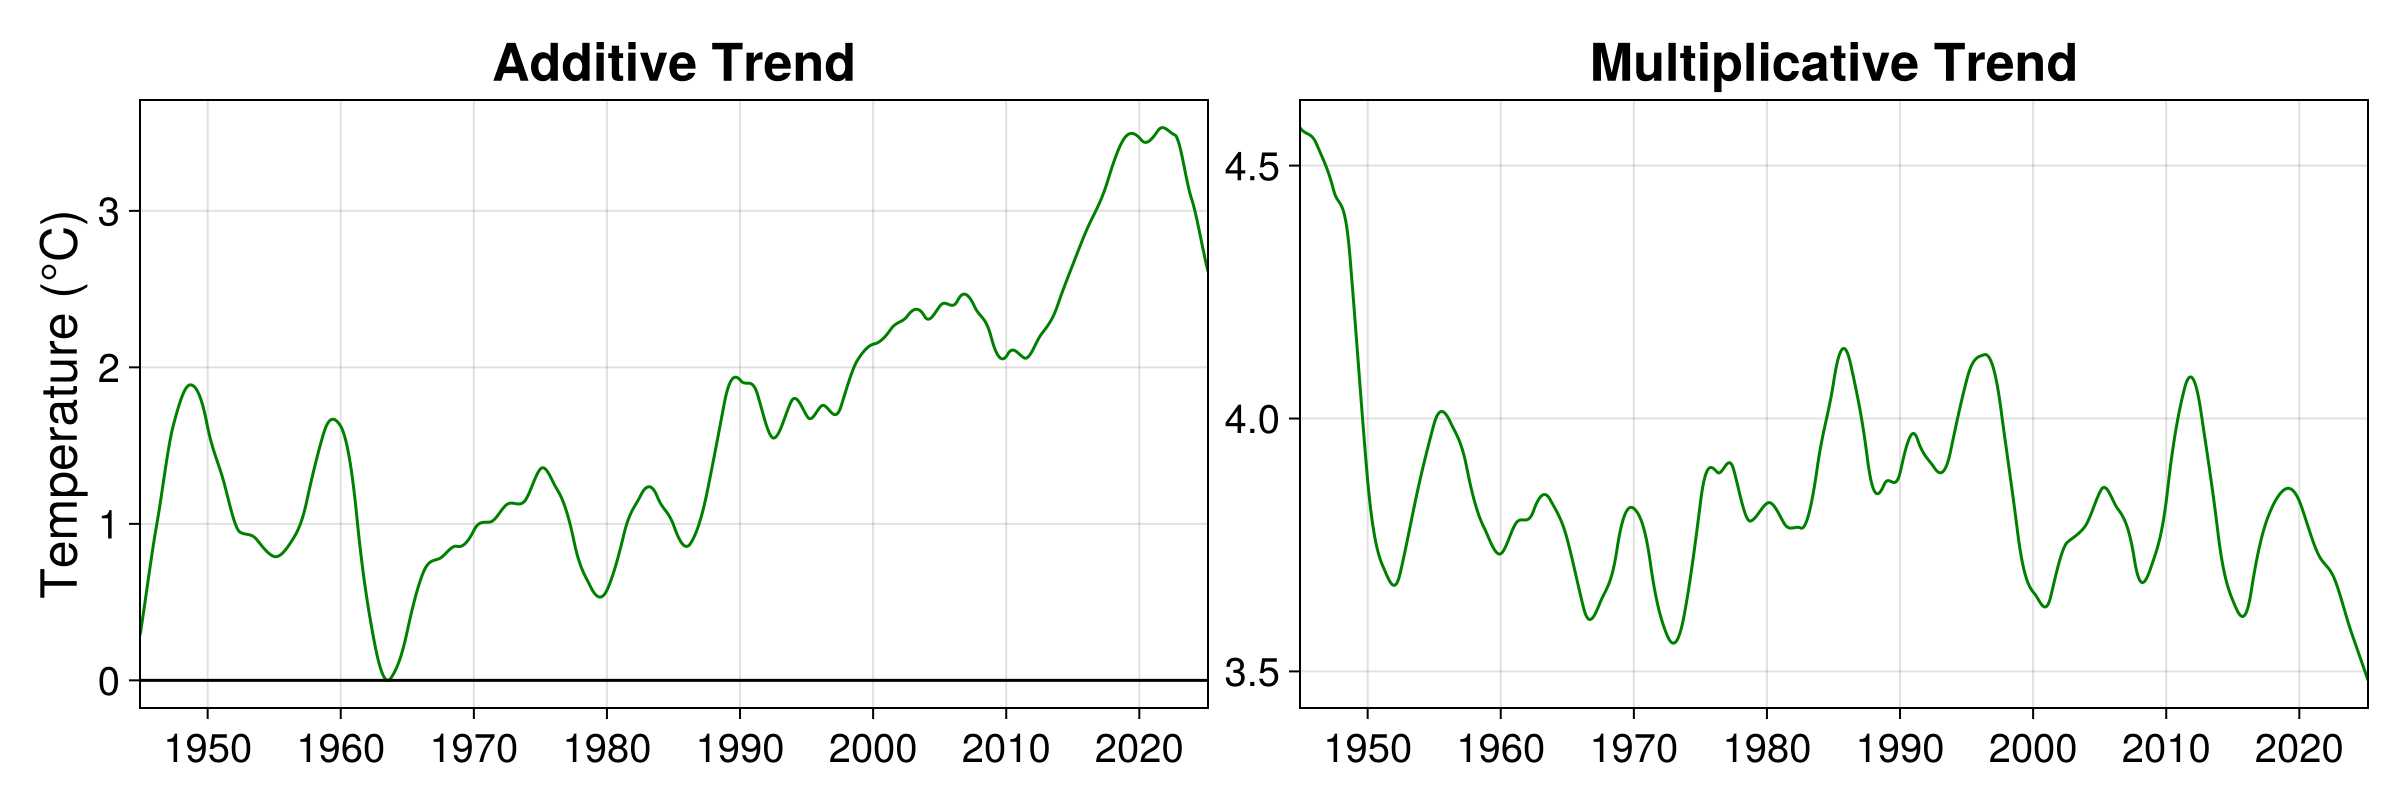

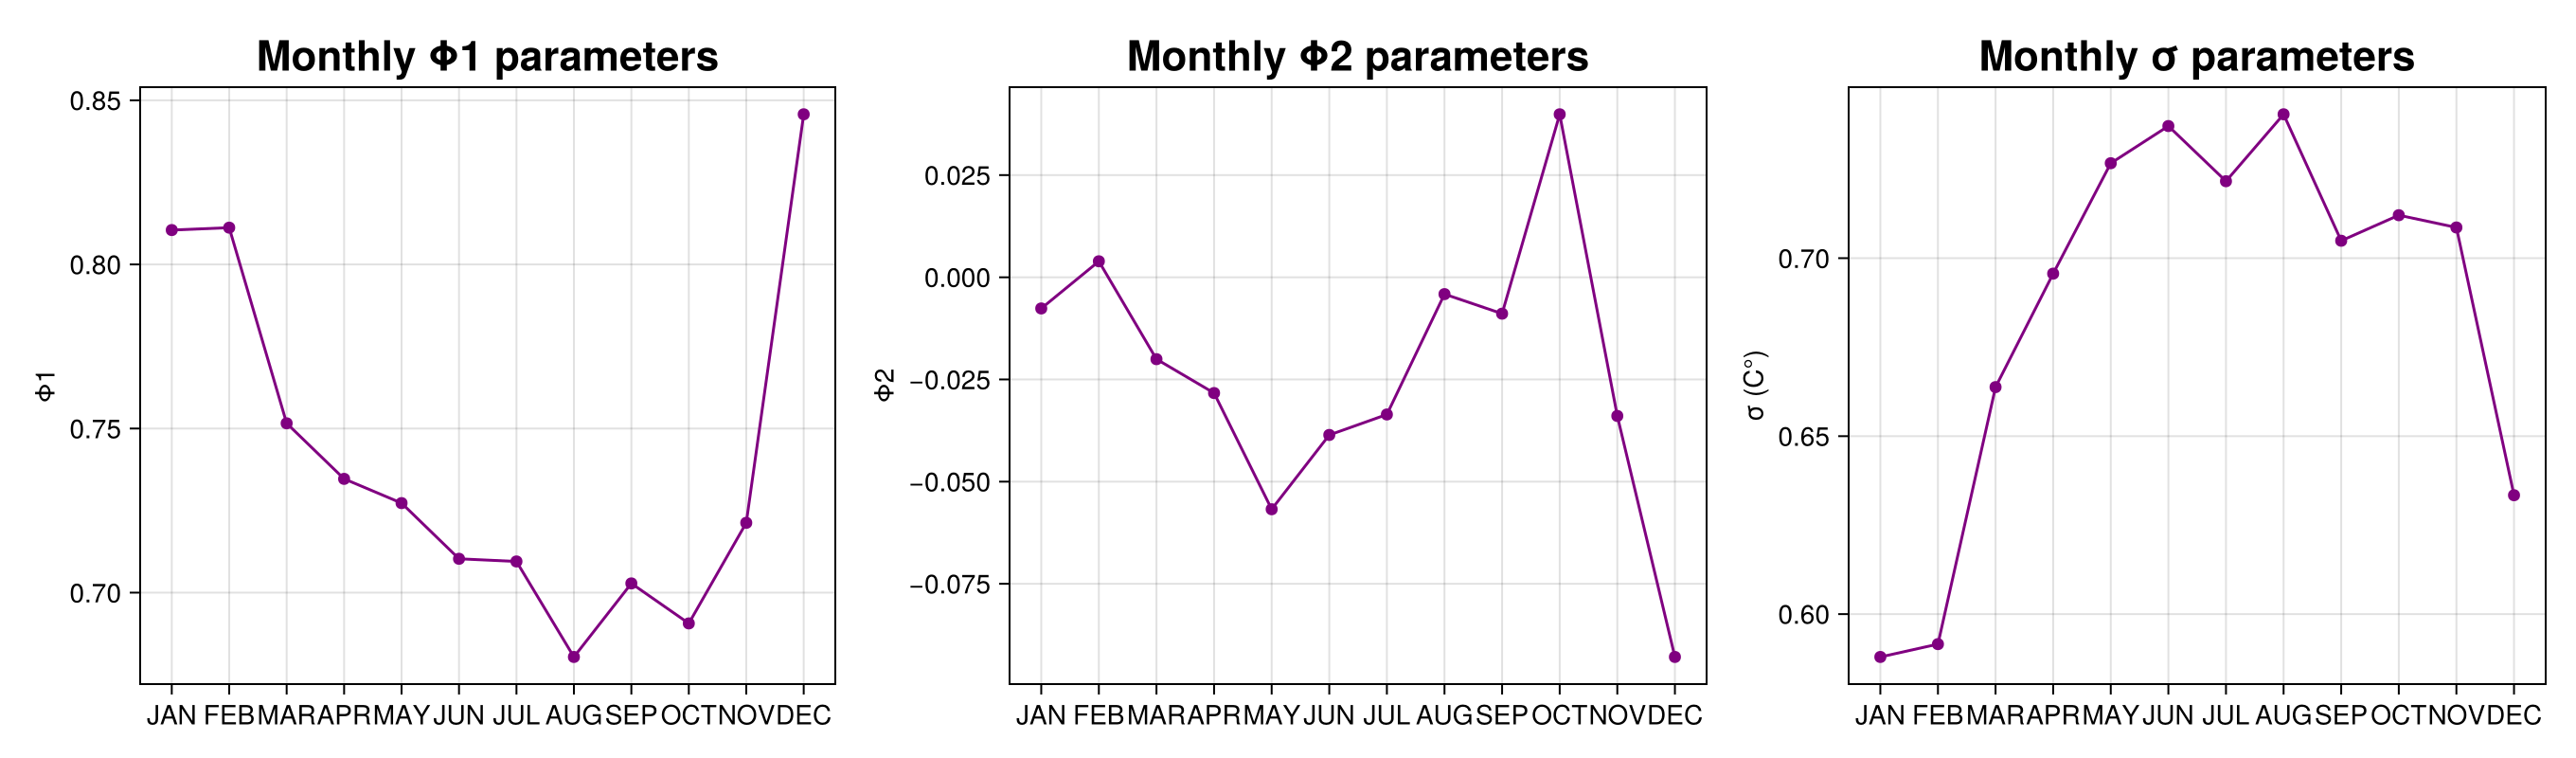

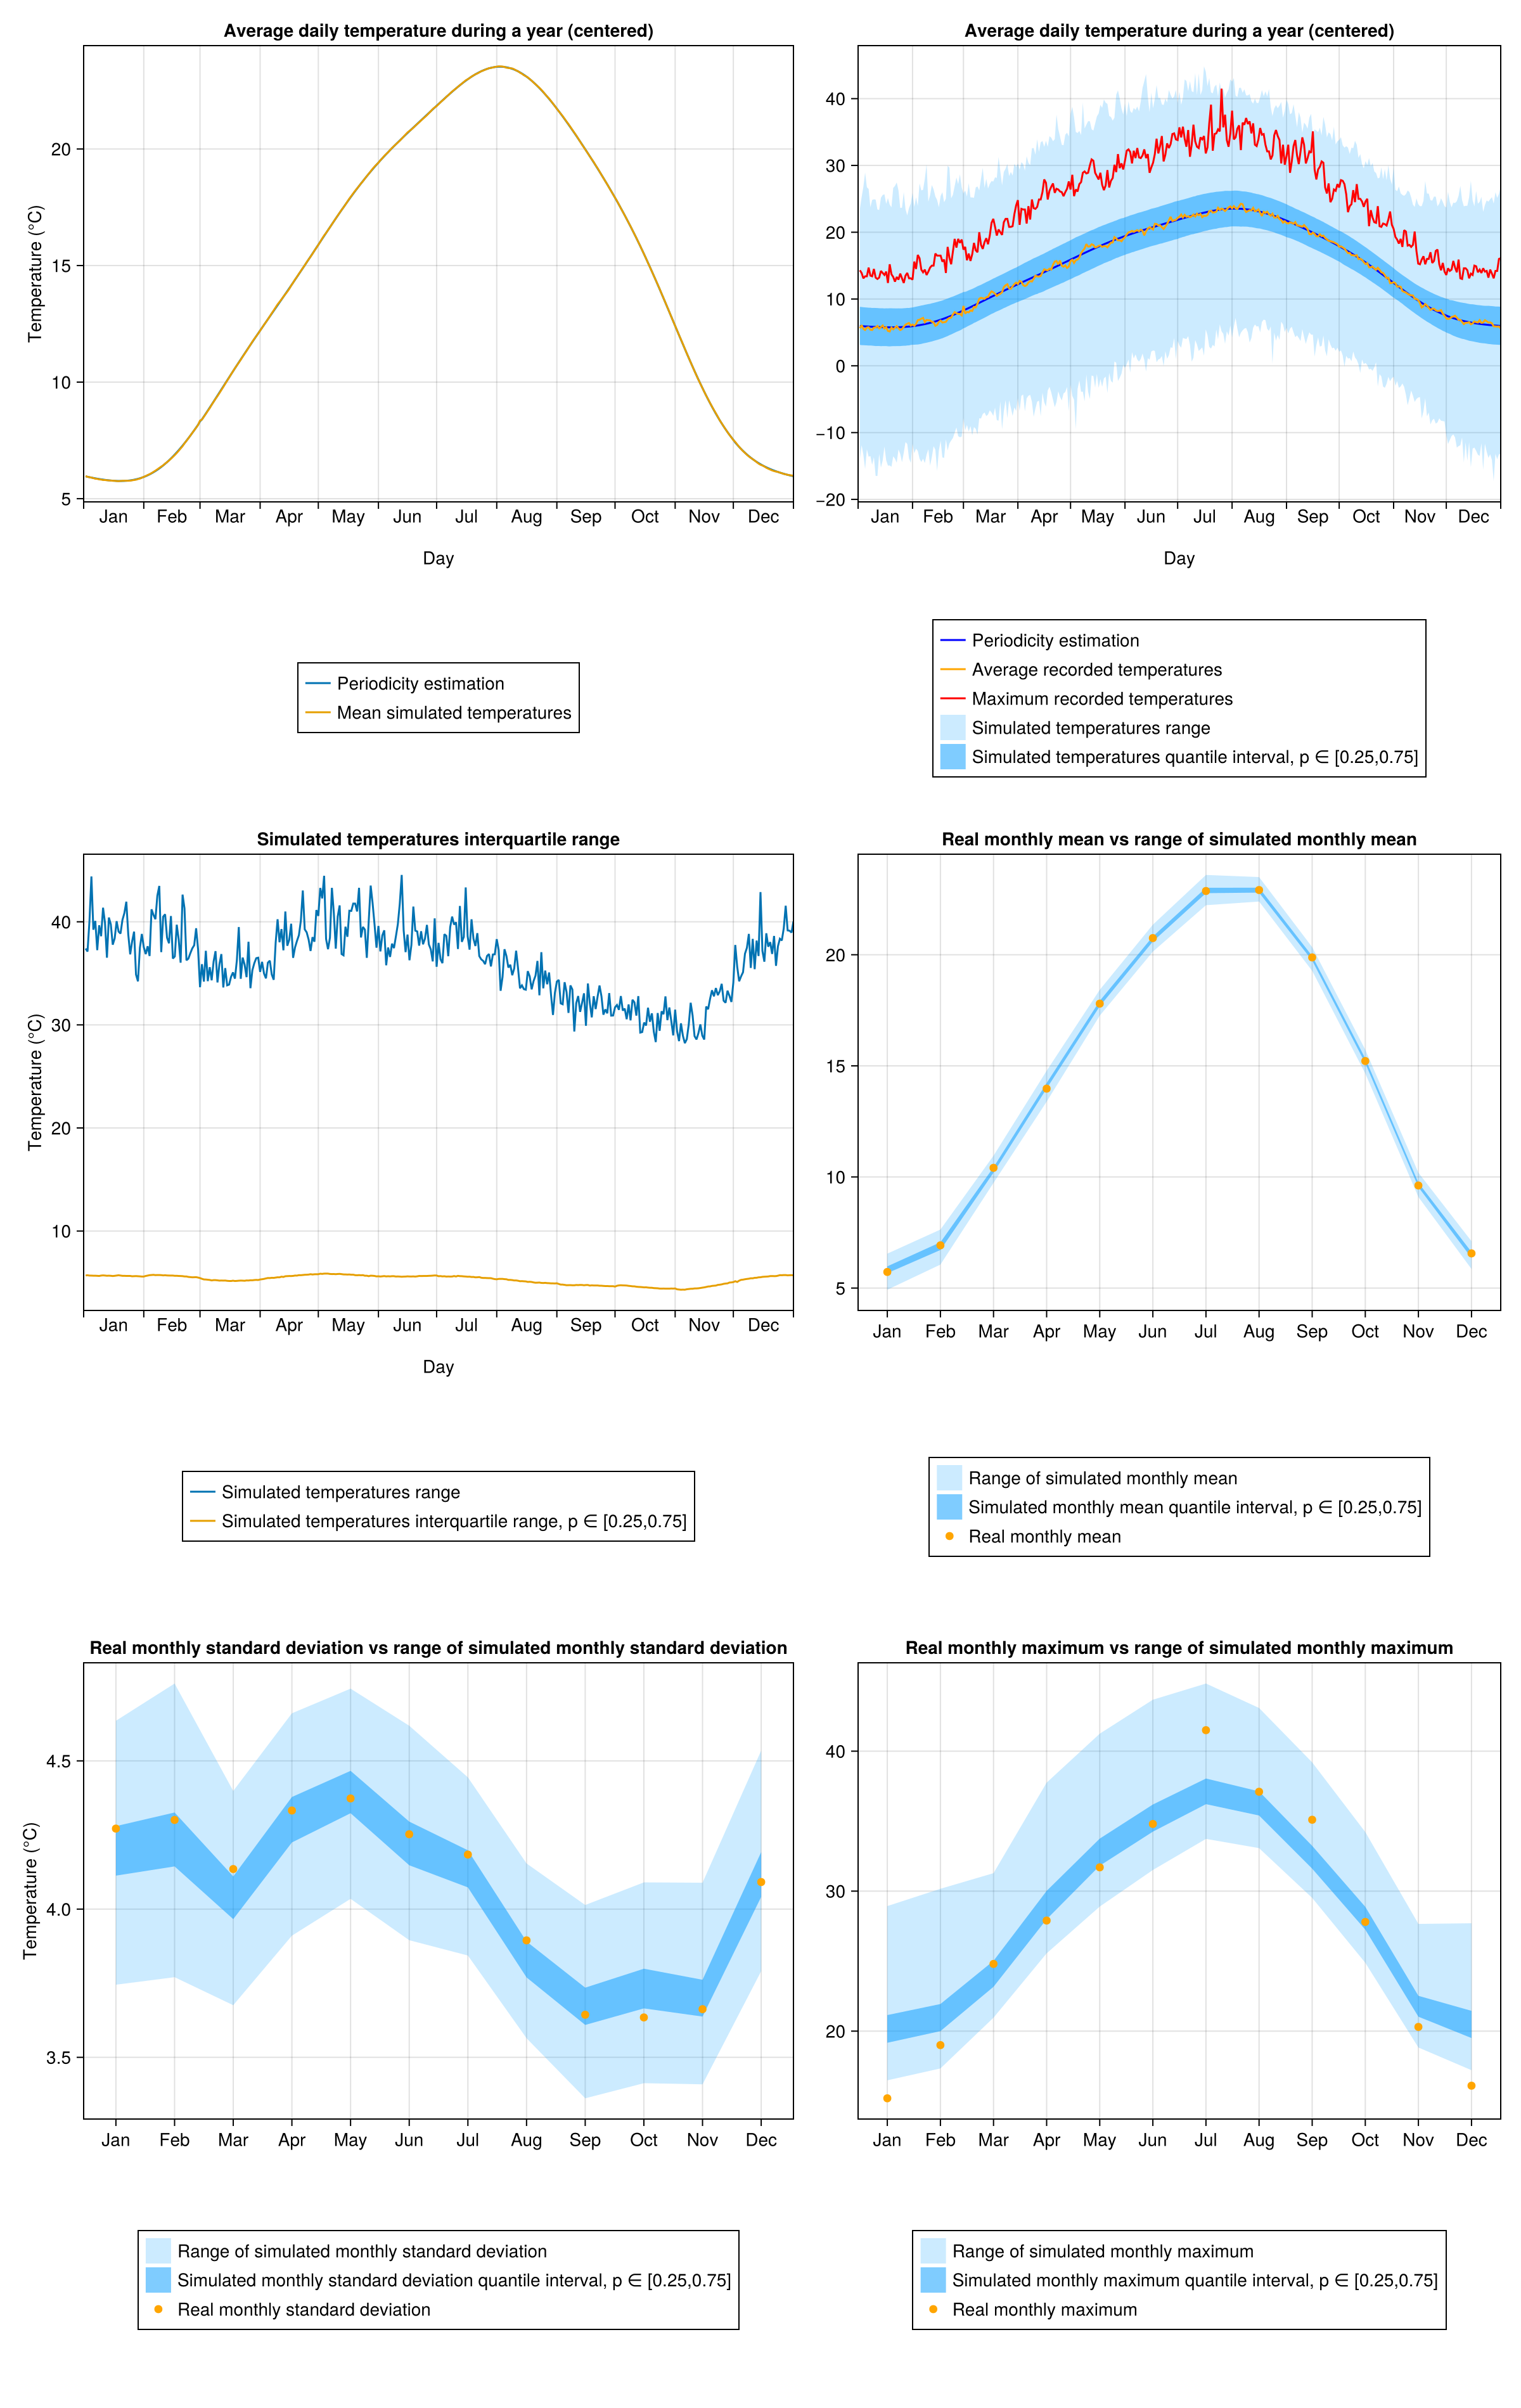

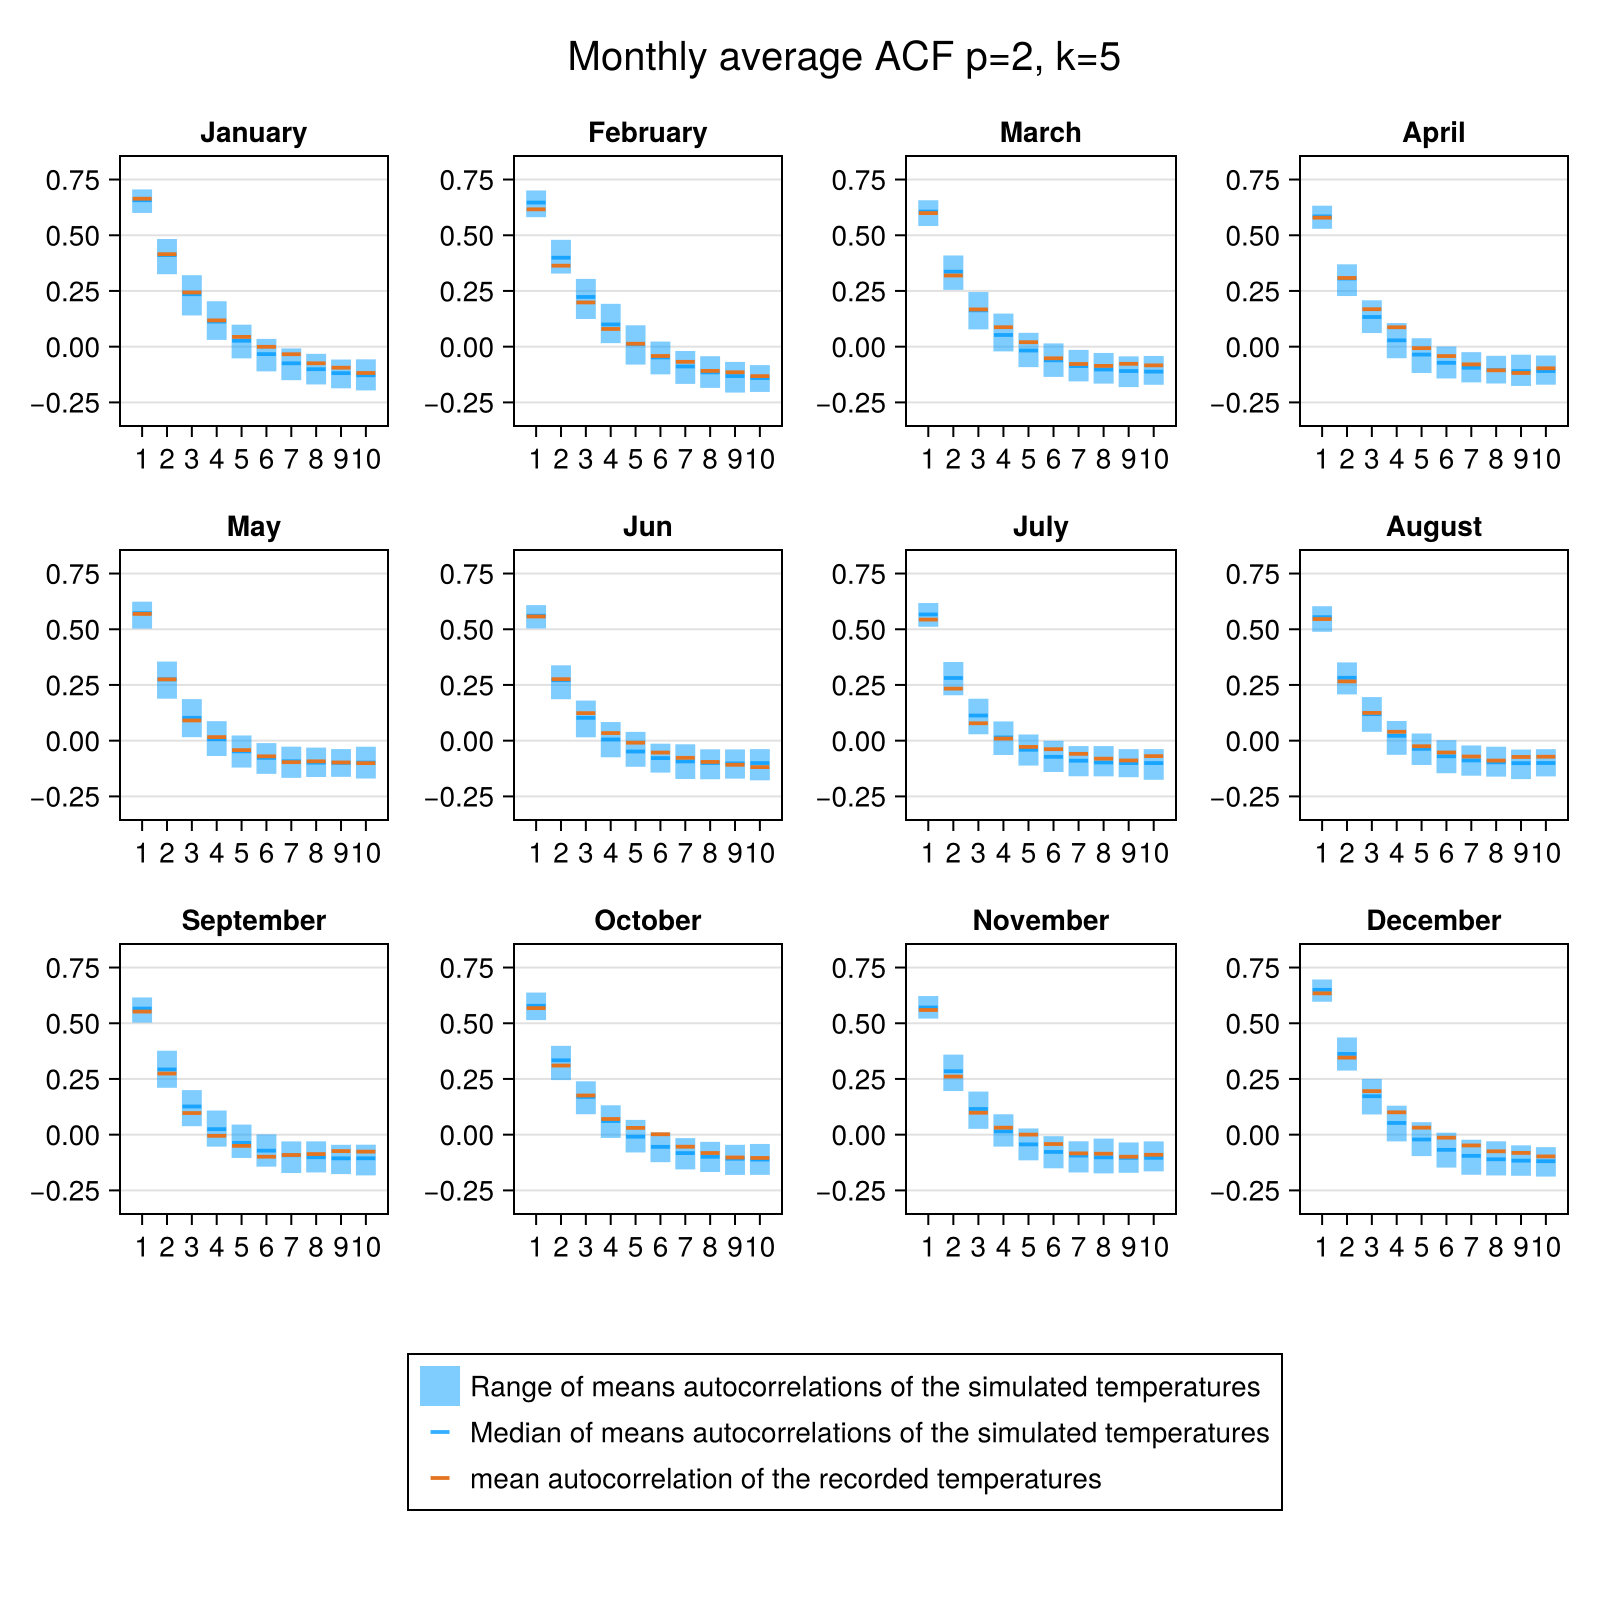

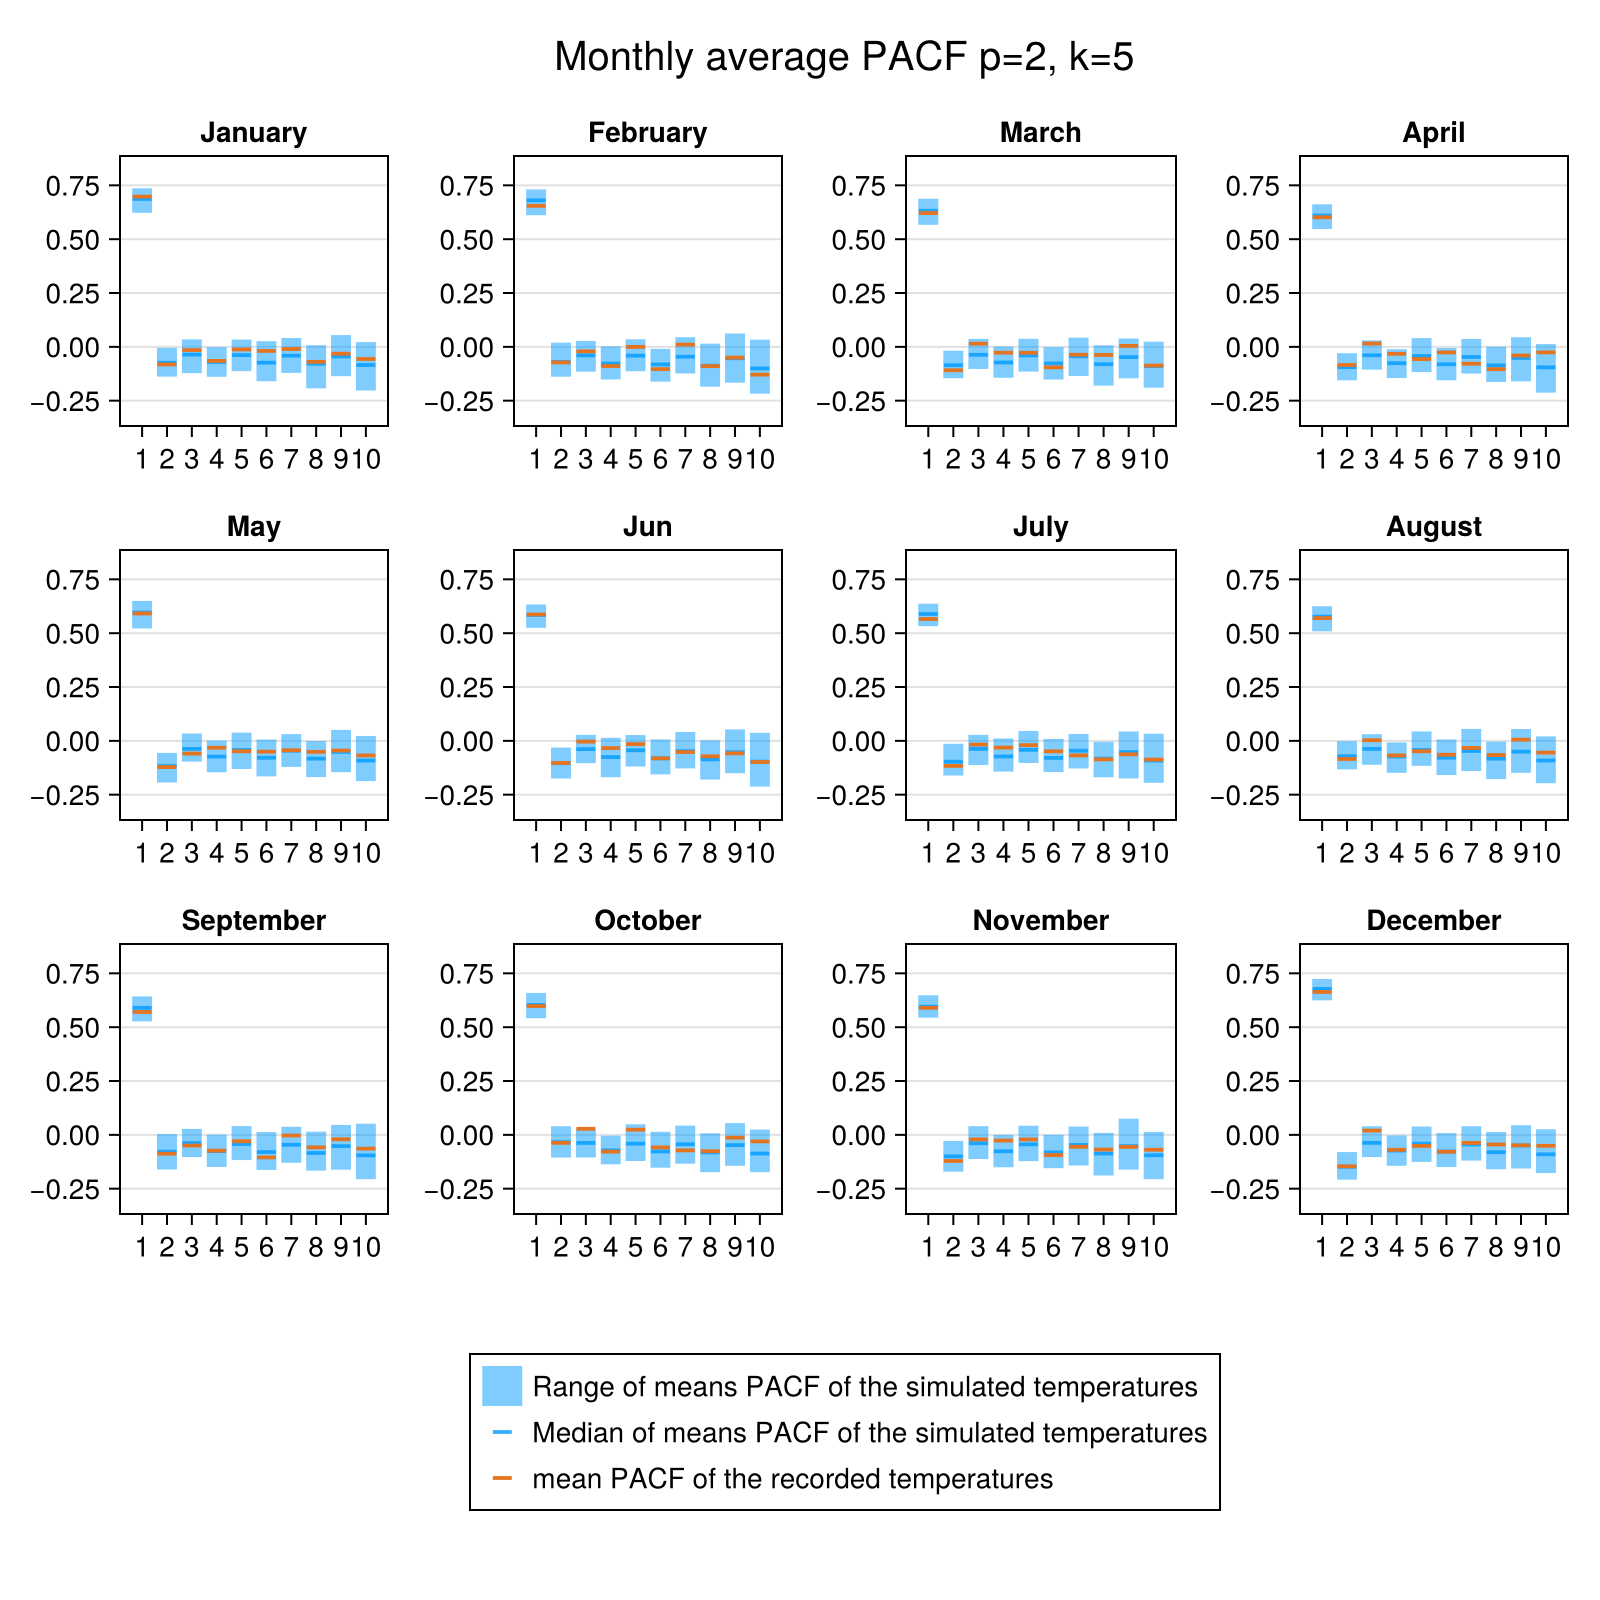

Additive periodicity order : 5
Multiplicative periodicity order : 5


In [8]:
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series, Model, folder=folder, settings=settings)
display.(fig_tuple)
println("Additive periodicity order : $(Model.period_order)")
println("Multiplicative periodicity order : $(Model.σ_period_order)")